### EN2550: Assignment 03 on Object Counting on a Conveyor Belt
### Connected Component Analysis

In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

1. Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

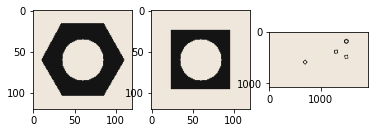

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)
conveyor_f101 =  cv.imread('conveyor_f101.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

2. Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

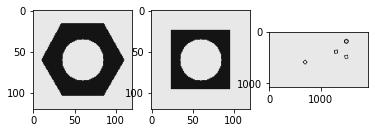

Threshold value for hexnut_template.png:  20.0
Threshold value for square_template.png:  20.0
Threshold value for conveyor_f100.png:  20.0


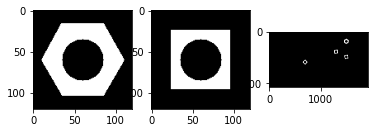

In [2]:
#convert images to grayscale

hexnut_template_gray = cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
squarenut_template_gray = cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)
conveyor_f101_gray = cv.cvtColor(conveyor_f101,cv.COLOR_BGR2GRAY)

fig, ax = plt. subplots(1,3)
ax[0].imshow(hexnut_template_gray,cmap= "gray",vmin=0, vmax=255)
ax[1].imshow(squarenut_template_gray,cmap= "gray",vmin=0, vmax=255)
ax[2].imshow(conveyor_f100_gray, cmap= "gray",vmin=0, vmax=255)
plt.show()

#Binarize images using Otsu's thresholding

ret1,hexnut_template_thr = cv.threshold(hexnut_template_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret2,squarenut_template_thr = cv.threshold(squarenut_template_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret3,conveyor_f100_thr = cv.threshold(conveyor_f100_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret4,conveyor_f101_thr = cv.threshold(conveyor_f101_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

print("Threshold value for hexnut_template.png: ", ret1)
print("Threshold value for square_template.png: ", ret2)
print("Threshold value for conveyor_f100.png: ", ret3)

fig, ax = plt. subplots(1,3)
ax[0].imshow(hexnut_template_thr, cmap= "gray",vmin=0, vmax=255)
ax[1].imshow(squarenut_template_thr, cmap= "gray",vmin=0, vmax=255)
ax[2].imshow(conveyor_f100_thr,cmap= "gray",vmin=0, vmax=255)
plt.show()

3. Carry out morphological closing to remove small holes inside the foreground. Use a 
3
×
3
 kernel. See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.

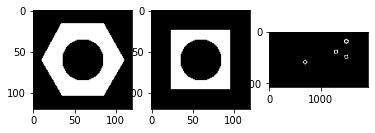

In [3]:
kernel = np.ones((3,3),np.uint8)
#Remove small holes

hexnut_template_closing=cv.morphologyEx(hexnut_template_thr, cv.MORPH_CLOSE, kernel)
squarenut_template_closing=cv.morphologyEx(squarenut_template_thr, cv.MORPH_CLOSE, kernel)
conveyor_f100_closing=cv.morphologyEx(conveyor_f100_thr, cv.MORPH_CLOSE, kernel)
conveyor_f101_closing=cv.morphologyEx(conveyor_f101_thr, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,3)
ax[0].imshow(hexnut_template_closing, cmap= "gray",vmin=0, vmax=255)
ax[1].imshow(squarenut_template_closing, cmap= "gray",vmin=0, vmax=255)
ax[2].imshow(conveyor_f100_closing,cmap= "gray",vmin=0, vmax=255)
plt.show()



4. Connected components analysis: apply the connectedComponentsWithStats function (see https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as colormapped images. Answer the following questions:

- How many connected components are detected in each image?
- What are the statistics? Interpret these statistics.
- What are the centroids?
- For the hexnut template, you should get the object area in pixel as approximately 4728.

Hexnut Image
Number of connected components:  2


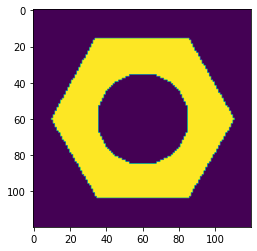

Stats: 
 [[   0    0  120  120 9672]
 [  10   16  101   88 4728]] 

Centroids: 
 [[59.33684864 59.63513234]
 [59.83375635 59.22356176]] 

Squarenut Image
Number of connected components:  2


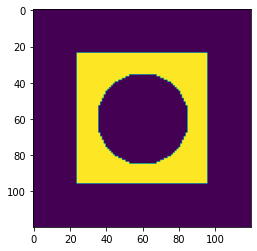

Stats: 
 [[    0     0   120   120 11173]
 [   24    24    72    72  3227]] 

Centroids: 
 [[59.5875772  59.5875772 ]
 [59.19677719 59.19677719]] 

Belt Image
Number of connected components:  5


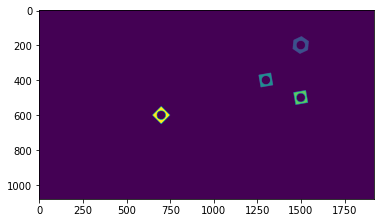

Stats: 
 [[      0       0    1920    1080 2059646]
 [   1454     150      92     100    4636]
 [   1259     359      82      82    3087]
 [   1459     459      82      82    3087]
 [    650     550     101     101    3144]] 

Centroids: 
 [[ 957.36323524  540.44416273]
 [1499.24201898  199.28515962]
 [1299.18302559  399.18302559]
 [1499.18302559  499.18302559]
 [ 700.          600.        ]] 



In [4]:
#Finding connected components

numlabels_t1, labels_t1, stats_t1, centroids_t1 = cv.connectedComponentsWithStats(hexnut_template_closing, 8, cv.CV_32S)
numlabels_t2, labels_t2, stats_t2, centroids_t2 = cv.connectedComponentsWithStats(squarenut_template_closing, 8, cv.CV_32S)
numlabels_b, labels_b, stats_b, centroids_b = cv.connectedComponentsWithStats(conveyor_f100_closing, 8, cv.CV_32S)

def cca_stats(img_name, numlabel, labels, stats, centroids):
    print(img_name)
    print("Number of connected components: ", numlabel)
    plt.imshow(labels.astype('uint8')); plt.show()
    print("Stats: \n", stats,'\n') 
    print("Centroids: \n", centroids,'\n')

cca_stats("Hexnut Image", numlabels_t1, labels_t1, stats_t1, centroids_t1)
cca_stats("Squarenut Image", numlabels_t2, labels_t2, stats_t2, centroids_t2)
cca_stats("Belt Image", numlabels_b, labels_b, stats_b, centroids_b)

5. Contour analysis: Use findContours function to retrieve the extreme outer contours. (see https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html for help and https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0 for information.

Text(0.5, 1.0, 'Detected Outer Contours')

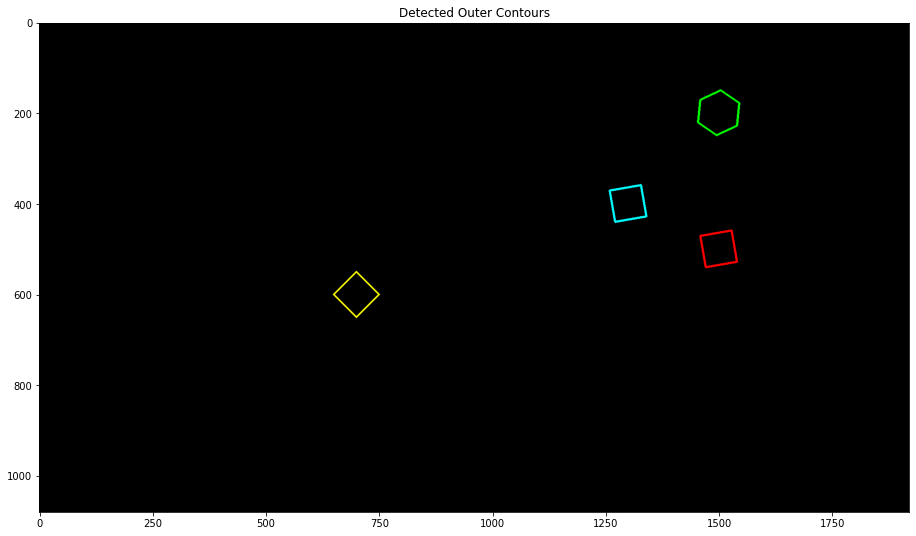

In [5]:
#Getting the contours of image
contours,hierarchy = cv.findContours(conveyor_f100_closing,2,1)
background = np.zeros((1080, 1920, 3)).astype(np.uint8)
color_arr = [(0, 255, 255), (0, 0, 255), (255, 255, 0), (0, 255, 0)]
col_count = 0

for i in range(len(contours)):
    cnt = contours[i]
    area = cv.contourArea(cnt) 

    if 4000 < area < 7000:  #Identifying the outer contours only
        cv.drawContours(background, [cnt], 0, color_arr[col_count], 3)
        col_count += 1
background = cv.cvtColor(background, cv.COLOR_BGR2RGB)
plt.figure(figsize=(16, 9))
plt.imshow(background)


### Detecting Objects on a Synthetic Conveyor

In this section, we will use the synthetic conveyor.mp4 sequence to count the two types of nuts.

1. Open the sequence and play it using the code below.
2. Count the number of matching hexagonal nuts in conveyor_f100.png. You can use matchCountours function as shown in https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html to match contours in each frame with that in th template.

1


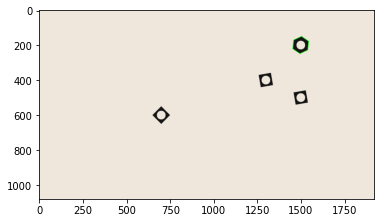

In [12]:
#Selecting contours for hexnut
hexnut_contours,hierarchy = cv.findContours(hexnut_template_closing,2,1)
hexnut = hexnut_contours[0]

#Selecting contours for squarenut
square_contours,hierarchy = cv.findContours(squarenut_template_closing,2,1)
square = square_contours[0]

#Getting all the contours of conveyor belt image
contours2,hierarchy2 = cv.findContours(conveyor_f100_closing,2,1)
image_copy=conveyor_f100.copy()

count=0
for i in range(len(contours2)):
    ret = cv.matchShapes(hexnut,contours2[i],1,0.0)
    
    if (ret<0.001):
        count+=1
        image_copy=conveyor_f100.copy()
        cv.drawContours(image_copy, contours2[i], contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv.LINE_AA)
        cv.imshow('Selected nuts', image_copy)
        cv.waitKey(0)
        plt.imshow(cv.cvtColor(image_copy, cv.COLOR_RGB2BGR))
cv.destroyAllWindows()
print(count)



3. Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video. Please compress your video (using Handbreak or otherwise) before uploading. It would be good to experiment first with the two adjacent frames conveyor_f100.png and conveyor_f101.png. In order to disregard partially appearing nuts, consider comparing the contour area in addition to using the matchCountours function

In [13]:
frame_array = []
shape = (1080, 1920, 3)

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
global_count=0 #total count upto current frame
prev=0 
kernel = np.ones((3,3),np.uint8)
while cap.isOpened():                             
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    #morphological closing
    frame_gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    ret,frame_thr = cv.threshold(frame_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    frame_template_closing=cv.morphologyEx(frame_thr, cv.MORPH_CLOSE, kernel)

    #Getting all the contours of the current frame
    contours,hierarchy = cv.findContours(frame_template_closing,2,1)
    frame_count=0
    for i in range(len(contours)):

        #Looking for similarity between contours
        err_hex = cv.matchShapes(hexnut,contours[i],1,0.0)
        err_square= cv.matchShapes(square,contours[i],1,0.0)
    
        #Detecting objects
        if ((err_hex<0.001) or (err_square<0.001)):
            frame_count+=1
            cv.drawContours(frame, contours[i], contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv.LINE_AA)
            
    if (prev<frame_count):
        global_count+=(frame_count-prev)

    prev=frame_count        
    f += 1
    text = 'Frame:' + str(f) +' '+ 'Current count:' + str(frame_count) + '  ' + "Count upto frame:"+ str(global_count)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    frame_array.append(frame)
    
    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()
print(global_count)


out = cv.VideoWriter('./conveyor_result_190128H.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
8
